In [20]:
# importing the packages
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
import sklearn.exceptions
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
from imblearn.under_sampling import NearMiss 
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)


from numpy import asarray
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [3]:
# loading data
data_train = pd.read_csv("fraudTrain.csv")
data_test = pd.read_csv("fraudTest.csv")
# taking smaller sample to run the model faster

df_train= data_train.sample(frac = 0.1,random_state=1)
df_test= data_test.sample(frac = 0.05,random_state=1)
print(df_train.shape,df_test.shape)
# function to drop tbe columns
def dropCol(data):
    col_to_drop = ['trans_date_trans_time','Unnamed: 0','cc_num','first','last','trans_num']
    res = data.drop(col_to_drop,axis = 1)
    return res
# dropping the columns
# dropping the columns ['trans_date_trans_time','Unnamed: 0','cc_num','first','last','trans_num']
# train data set
df_train = dropCol(df_train)
# test data set
df_test = dropCol(df_test)

print ( df_train.shape, df_test.shape)

#Create independent and Dependent Features
columns = df_train.columns.tolist()

# removing the dependent feature is_fraud
columns = [c for c in columns if c not in ["is_fraud"]]

X_train = df_train[columns]
Y_train = df_train['is_fraud']
X_test = df_test[columns]
Y_test = df_test['is_fraud']
print ( X_train.shape, Y_train.shape,X_test.shape, Y_test.shape)

# function to convert dob to years
def age_years(born):
    return 2019 - int(born[0:4])

# replacing the dob column with age column in our data set for test and train
X_train['age'] = X_train['dob'].apply(lambda x: age_years(x))
X_train = X_train.drop(['dob'],axis =1)

X_test['age'] = X_test['dob'].apply(lambda x: age_years(x))
X_test = X_test.drop(['dob'],axis =1)
print(X_train.shape,X_test.shape)

# concanating the test and train data so that number of columns remain the same in both the data sets
final_df = pd.concat([X_train,X_test],axis=0)
final_df.shape


# creating the list of categorical variables
categorical_features =[feature for feature in X_train.columns if final_df[feature].dtypes == 'O']
categorical_features

# function to convert categorical variables to one hot encoding
def category_onehot_multcols(data,multcolumns):
    df_final = data
    i=0
    for fields in multcolumns:
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:           
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1             
    df_final=pd.concat([final_df,df_final],axis=1)
    return df_final

# applying the one hot encoding
final_df = category_onehot_multcols(final_df, categorical_features)

# removing duplicated columns
final_df =final_df.loc[:,~final_df.columns.duplicated()]
final_df.shape

# separating the test and training data
df_Train=final_df.iloc[:129668,:]
df_Test=final_df.iloc[129668:,:]
print(df_Train.shape,df_Test.shape)

print(Y_train.value_counts(),"\n",Y_test.value_counts())

# files ready for testing on models
print(df_Train.shape, df_Test.shape, Y_train.shape, Y_test.shape)


(129668, 23) (27786, 23)
(129668, 17) (27786, 17)
(129668, 16) (129668,) (27786, 16) (27786,)
(129668, 16) (27786, 16)
merchant
category
gender
street
city
state
job
(129668, 3077) (27786, 3077)
0    128963
1       705
Name: is_fraud, dtype: int64 
 0    27656
1      130
Name: is_fraud, dtype: int64
(129668, 3077) (27786, 3077) (129668,) (27786,)


In [18]:
#Let's evaluate our model 
def print_eval(y_pred,model):
    print("Training Accuracy: ",model.score(df_Train, Y_train))
    print("Testing Accuracy: ", model.score(df_Test, Y_test))
    cm = confusion_matrix(Y_test, y_pred)
    print(cm)
    print(classification_report(Y_test,y_pred))


In [77]:
df_Train_copy = df_Train.copy()
df_Test_copy = df_Test.copy()

   
### 5.  Considering the Fraud cases as anamoly and use anamoly detection methods such as:   
> 5.1 Simple Statistical Methods : Metrics such as distribution, including mean, median, mode, and quantiles could be used to identify outliers since the definition of an anomalous data point is one that deviates by a certain standard deviation from the mean.    
5.2 Density-Based Anomaly Detection : These include the    
> 5.2.1 k-nearest neighbors algorithm   
5.2.2 Relative density of data based method known as local outlier factor (LOF) algorithm **(Implemented)**   
5.3 Isolation Forest **(Implemented)**   
5.4 Clustering-Based Anomaly Detection : K-means algorithm  
5.5 Support Vector Machine-Based Anomaly Detection          
5.6 Using Auto Encoders **(Implemented)**       
5.7 Neural Network  (Same as Autoencoders? ???)  
5.8 OneClassSVM    
5.9 DBSCAN    

### 5.1 Simple Statistical Methods 
Metrics such as distribution, including mean, median, mode, and quantiles could be used to identify outliers since the definition of an anomalous data point is one that deviates by a certain standard deviation from the mean. 


In [ ]:
# upper and lower limit calculation with z score method and handling out liers
#data = pd.read_csv('machine_0.csv',index_col=0)
def handle_outlier(data):
"""The function takes the data and replaces all the outlier values o f all columns
with '0000000001' """
data_outlier_handled = data.copy() 
column_names = data.columns 
total_outliers = []
for col in column_names:
t=0
upper_boundary = data_outlier_handled[col].mean() + 3 * data_out lier_handled[col].std()
lower_boundary = data_outlier_handled[col].mean() - 3 * data_out lier_handled[col].std()
data_outlier_handled.loc[data_outlier_handled[col] > upper_bound ary,col] = 0.0000000001
data_outlier_handled.loc[data_outlier_handled[col] < lower_bound ary,col] = 0.0000000001
tu = data[data[col] > upper_boundary].count()[1] tl = data[data[col] < lower_boundary].count()[1]
#total_outliers.append(round((tu+tl)/len(data),2)) #to calculate the percent of outliers handled
#print(total_outliers) #to print the percent of outliers handled
return data_outlier_handled

## -----------------------------------------------------------------------------------------------------------

###  5.2  Local Outlier Factor  
Density-Based Anomaly Detection : These include the k-nearest neighbors algorithm, Relative density of data based method known as local outlier factor (LOF) algorithm 
    

#### Acknowledgement
https://medium.com/datadriveninvestor/credit-card-fraud-detection-using-local-outlier-factor-and-isolation-forest-in-python-56edd0a44af5
    

In [121]:
## Get the Fraud and the normal  transaction numbers for test and train dataset 

fraud_train = df_train[df_train['is_fraud']==1]
normal_train = df_train[df_train['is_fraud']==0]
fraud_test = df_test[df_test['is_fraud']==1]
normal_test = df_test[df_test['is_fraud']==0]

print("Normal cases in train set :",len(df_train)-len(fraud_train),"\nFraud cases in train set :",len(fraud_train))
print("Normal cases in test set :",len(df_test)-len(fraud_test),"\nFraud cases in test set :",len(fraud_test))
outlier_fraction = round(len(fraud_train)/len(df_train),4)
print("Fraud percentage :", outlier_fraction)
print("Fraud percentage :", len(fraud_test)/len(df_test))

Normal cases in train set : 128963 
Fraud cases in train set : 705
Normal cases in test set : 27656 
Fraud cases in test set : 130
Fraud percentage : 0.0054
Fraud percentage : 0.004678615129921543


In [118]:
# preprocssed files for our use
print(df_Train.shape, df_Test.shape, Y_train.shape, Y_test.shape)

(129668, 3077) (27786, 3077) (129668,) (27786,)


In [122]:
# train data set
a = LocalOutlierFactor(n_neighbors = 20,contamination = outlier_fraction)
y_prediction1 = a.fit_predict(df_Train) # Fitting the model.
y_prediction1[y_prediction1 == 1] = 0 # Valid transactions are labelled as 0.
y_prediction1[y_prediction1 == -1] = 1 # Fraudulent transactions are labelled as 1.
errors1 = (y_prediction1 != Y_train).sum() # Total number of errors is calculated.
print(errors1)
print(accuracy_score(y_prediction1,Y_train))
print(classification_report(y_prediction1,Y_train))

1394
0.9892494678717957
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    128967
           1       0.01      0.01      0.01       701

    accuracy                           0.99    129668
   macro avg       0.50      0.50      0.50    129668
weighted avg       0.99      0.99      0.99    129668



In [126]:
# test data set

y_prediction1 = a.fit_predict(df_Test) # Fitting the model.
y_prediction1[y_prediction1 == 1] = 0 # Valid transactions are labelled as 0.
y_prediction1[y_prediction1 == -1] = 1 # Fraudulent transactions are labelled as 1.
errors1 = (y_prediction1 != Y_test).sum() # Total number of errors is calculated.
print(errors1)
print(accuracy_score(y_prediction1,Y_test))
print(classification_report(y_prediction1,Y_test))

279
0.9899589721442453
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     27635
           1       0.01      0.01      0.01       151

    accuracy                           0.99     27786
   macro avg       0.50      0.50      0.50     27786
weighted avg       0.99      0.99      0.99     27786



#### We see that Local Outlier Factor does not perform well as it gives Recall of 0.01 for bothe Test set and Train set.  
## -----------------------------------------------------------------------------------------------------------

## 5.3 Isolation Forest    
Isolation Forest is based on the Decision Tree algorithm. It isolates the outliers by randomly selecting a feature from the given set of features and then randomly selecting a split value between the max and min values of that feature. This random partitioning of features will produce shorter paths in trees for the anomalous data points, thus distinguishing them from the rest of the data.

#### Acknowledgement
https://medium.com/datadriveninvestor/credit-card-fraud-detection-using-local-outlier-factor-and-isolation-forest-in-python-56edd0a44af5
    

#### https://www.youtube.com/watch?v=TP3wdwD8JVY 

In [123]:
# isolation forest for train
b = IsolationForest(max_samples = len(df_Train),contamination = outlier_fraction).fit(df_Train) # Fitting the model.
y_prediction2 = b.predict(df_Train) # Prediction using trained model.
y_prediction2[y_prediction2 == 1] = 0 # Valid transactions are labelled as 0.
y_prediction2[y_prediction2 == -1] = 1 # Fraudulent transactions are labelled as 1.
errors2 = (y_prediction2 != Y_train).sum() # Total number of errors is calculated.
print(errors2)
print(accuracy_score(y_prediction2,Y_train))
print(classification_report(y_prediction2,Y_train))

1376
0.989388283925101
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    128967
           1       0.02      0.02      0.02       701

    accuracy                           0.99    129668
   macro avg       0.51      0.51      0.51    129668
weighted avg       0.99      0.99      0.99    129668



In [127]:
# isolation forest for train
b = IsolationForest(max_samples = len(df_Test),contamination = outlier_fraction).fit(df_Test) # Fitting the model.
y_prediction2 = b.predict(df_Test) # Prediction using trained model.
y_prediction2[y_prediction2 == 1] = 0 # Valid transactions are labelled as 0.
y_prediction2[y_prediction2 == -1] = 1 # Fraudulent transactions are labelled as 1.
errors2 = (y_prediction2 != Y_test).sum() # Total number of errors is calculated.
print(errors2)
print(accuracy_score(y_prediction2,Y_test))
print(classification_report(y_prediction2,Y_test))

271
0.9902468869214712
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     27635
           1       0.04      0.03      0.04       151

    accuracy                           0.99     27786
   macro avg       0.52      0.51      0.52     27786
weighted avg       0.99      0.99      0.99     27786



#### We see that Isolation Forest does not perform well as it gives Recall of 0.03 on Test set and 0.02 on Train set.

## 5.6 Implementing Autoencoder to detect the fraud cases


#### Acknowledgemet:
https://medium.com/@curiousily/credit-card-fraud-detection-using-autoencoders-in-keras-tensorflow-for-hackers-part-vii-20e0c85301bd (Venelin Vankov)    
https://github.com/curiousily/Credit-Card-Fraud-Detection-using-Autoencoders-in-Keras/blob/master/fraud_detection.ipynb    

https://www.youtube.com/watch?v=S31E-ftRfQI    

https://github.com/dpanagop/ML_and_AI_examples/blob/master/Credit_Fraud_detection_with_autoencoders.ipynb  (not used)   
https://www.youtube.com/watch?v=S31E-ftRfQI  (refernce)  

       

In [78]:
# preprocessing 


df_Train_copy = df_Train_copy.drop(['unix_time'], axis=1)
df_Test_copy = df_Test_copy.drop(['unix_time'], axis=1)

df_Train_copy['amt'] = StandardScaler().fit_transform(df_Train_copy['amt'].values.reshape(-1, 1))
df_Test_copy['amt'] = StandardScaler().fit_transform(df_Test_copy['amt'].values.reshape(-1, 1))

In [79]:
df_Train_copy.shape,df_Test_copy.shape

((129668, 3076), (27786, 3076))

Our Autoencoder uses 4 fully connected layers with 14, 7, 7 and 29 neurons respectively. The first two layers are used for our encoder, the last two go for the decoder. Additionally, L1 regularization will be used during training:

In [80]:
# building the model
input_dim = df_Train_copy.shape[1]

encoding_dim = 14

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [82]:
nb_epoch = 100
batch_size = 32
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(df_Train_copy, df_Train_copy,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(df_Test_copy, df_Test_copy),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/100
4053/4053 [==============================] - 12s 3ms/step - loss: 33123092.0000 - accuracy: 0.7762 - val_loss: 35099472.0000 - val_accuracy: 0.7910
Epoch 2/100
4053/4053 [==============================] - 9s 2ms/step - loss: 33120408.0000 - accuracy: 0.7910 - val_loss: 35096760.0000 - val_accuracy: 0.7910
Epoch 3/100
4053/4053 [==============================] - 11s 3ms/step - loss: 33117814.0000 - accuracy: 0.7910 - val_loss: 35094080.0000 - val_accuracy: 0.7910
Epoch 4/100
4053/4053 [==============================] - 12s 3ms/step - loss: 33115254.0000 - accuracy: 0.7910 - val_loss: 35091440.0000 - val_accuracy: 0.7910
Epoch 5/100
4053/4053 [==============================] - 10s 3ms/step - loss: 33112558.0000 - accuracy: 0.7910 - val_loss: 35088764.0000 - val_accuracy: 0.7910
Epoch 6/100
4053/4053 [==============================] - 10s 3ms/step - loss: 33109974.0000 - accuracy: 0.7910 - val_loss: 35086112.0000 - val_accuracy: 0.7910
Epoch 7/100
4053/4053 [==================

4053/4053 [==============================] - 14s 3ms/step - loss: 32996124.0000 - accuracy: 0.7910 - val_loss: 34970228.0000 - val_accuracy: 0.7910
Epoch 51/100
4053/4053 [==============================] - 14s 3ms/step - loss: 32993570.0000 - accuracy: 0.7910 - val_loss: 34967676.0000 - val_accuracy: 0.7910
Epoch 52/100
4053/4053 [==============================] - 16s 4ms/step - loss: 32991026.0000 - accuracy: 0.7910 - val_loss: 34965048.0000 - val_accuracy: 0.7910
Epoch 53/100
4053/4053 [==============================] - 15s 4ms/step - loss: 32988432.0000 - accuracy: 0.7910 - val_loss: 34962480.0000 - val_accuracy: 0.7910
Epoch 54/100
4053/4053 [==============================] - 13s 3ms/step - loss: 32985950.0000 - accuracy: 0.7910 - val_loss: 34959868.0000 - val_accuracy: 0.7910
Epoch 55/100
4053/4053 [==============================] - 14s 3ms/step - loss: 32983384.0000 - accuracy: 0.7910 - val_loss: 34957276.0000 - val_accuracy: 0.7910
Epoch 56/100
4053/4053 [=======================

In [83]:
# loading the saved model
autoencoder = load_model('model.h5')


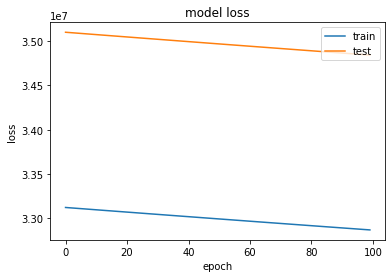

In [84]:
#evaluations
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [85]:
predictions = autoencoder.predict(df_Test_copy)

mse = np.mean(np.power(df_Test_copy - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': Y_test})
error_df.describe()

,reconstruction_error,true_class
count,2.778600e+04,27786.000000
mean,3.484177e+07,0.004679
std,2.099092e+08,0.068241
min,1.075042e+02,0.000000
25%,2.517275e+05,0.000000
50%,9.768356e+05,0.000000
75%,2.151963e+06,0.000000
max,2.743262e+09,1.000000


In order to predict whether or not a new/unseen transaction is normal or fraudulent, we’ll calculate the reconstruction error from the transaction data itself.   
If the error is larger than a predefined threshold, we’ll mark it as a fraud (since our model should have a low error on normal transactions).   
Picking a value as .004 times the mean .( Chosen empirically)

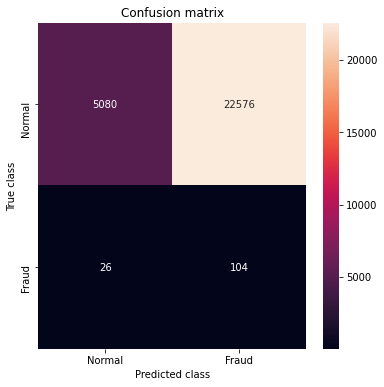

In [110]:
# predictions
threshold = (3.484177e+07)*.004


LABELS = ["Normal", "Fraud"]
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [111]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.18      0.31     27656
           1       0.00      0.80      0.01       130

    accuracy                           0.19     27786
   macro avg       0.50      0.49      0.16     27786
weighted avg       0.99      0.19      0.31     27786



## Observation 
### Not effective 
The model is predicting the fraud with a recall of 80% , but at the same time it is classifying 22576 cases as fraud which were not fraud.